
# 🧩 Joining Data with pandas — Inner Join Notes

## 📚 Overview

In this section, we explore how to **combine (merge/join) multiple tables (DataFrames)** using pandas. This is essential because real-world data is often distributed across several sources. You’ll learn how to:
- Merge two related datasets using a **common column** (a key).
- Understand what an **inner join** does.
- Handle **column name conflicts** using **suffixes**.

---

## 📝 Clarifications

- ✅ A **table** = a **DataFrame** in pandas.
- ✅ **Merging** = **Joining** = combining two tables based on a common column.

---

## 🏙 Dataset Overview

We use data from the **Chicago Data Portal**.

### Datasets:
1. `Ward_Offices.csv` — Info about ward offices (e.g., aldermen, office addresses).
2. `Ward_Census.csv` — Info about population changes in each ward.

---

## 📄 The Ward Data

```python
# Load ward office data
wards = pd.read_csv('Ward_Offices.csv')
print(wards.head())
print(wards.shape)
````

### ✅ Output:

```text
   ward         alderman           address         zip
0     1  Proco "Joe"...    2058 NORTH W...    60647
1     2  Brian Hopkins     1400 NORTH ...    60622
2     3  Pat Dowell        5046 SOUTH S...    60609
3     4  William D. B...   435 EAST 35T...    60616
4     5  Leslie A. Ha...   2325 EAST 71...    60649
```

```text
(50, 4)
```

### 🔍 Explanation:

* `pd.read_csv(...)` loads a CSV file into a DataFrame.
* `.head()` shows the first 5 rows.
* `.shape` confirms 50 rows and 4 columns:

  * `ward`: ward number.
  * `alderman`: elected official.
  * `address`: office address.
  * `zip`: postal code.

---

## 🧮 The Census Data

```python
# Load census data
census = pd.read_csv('Ward_Census.csv')
print(census.head())
print(census.shape)
```

### ✅ Output:

```text
   ward  pop_2000  pop_2010 change            address         zip
0     1     52951     56149     6%     2765 WEST SA...    60647
1     2     54361     55805     3%     WM WASTE MAN...    60622
2     3     40385     53039    31%     17 EAST 38TH...    60653
3     4     51953     54589     5%     31ST ST HARB...    60653
4     5     55302     51455    -7%     JACKSON PARK...    60637
```

```text
(50, 6)
```

### 🔍 Explanation:

* This DataFrame has 50 rows (one per ward) and 6 columns:

  * `ward`: ward number.
  * `pop_2000`, `pop_2010`: population counts for 2000 and 2010.
  * `change`: percentage change.
  * `address`, `zip`: central location of the ward.

---

## 🔗 Merging Tables — Inner Join

```python
# Merge the two datasets on the 'ward' column
wards_census = wards.merge(census, on='ward')
print(wards_census.head(4))
print(wards_census.shape)
```

### ✅ Output:

```text
   ward       alderman       address_x   zip_x  pop_2000  pop_2010 change     address_y      zip_y
0     1  Proco "Joe"... 2058 NORTH W...  60647     52951     56149    6%   2765 WEST SA...   60647
1     2  Brian Hopkins  1400 NORTH ...  60622     54361     55805    3%   WM WASTE MAN...   60622
2     3  Pat Dowell     5046 SOUTH S... 60609     40385     53039   31%   17 EAST 38TH...   60653
3     4  William D. B... 435 EAST 35T... 60616     51953     54589    5%   31ST ST HARB...  60653
```

```text
(50, 9)
```

### 🔍 Explanation:

* `wards.merge(census, on='ward')` performs an **inner join**:

  * It finds rows with **matching `ward` values** in both tables.
  * Keeps **only rows where a match exists in both** — hence 50 rows.
* Columns with the same name in both tables (`address`, `zip`) are renamed:

  * `_x`: from the **left table** (`wards`)
  * `_y`: from the **right table** (`census`)
* The final DataFrame has **9 columns**: all columns from both tables, with renamed duplicates.

---

## 🏷 Handling Column Name Conflicts with Custom Suffixes

```python
# Use custom suffixes for clarity
wards_census = wards.merge(census, on='ward', suffixes=('_ward', '_cen'))
print(wards_census.columns)
```

### ✅ Output:

```text
Index(['ward', 'alderman', 'address_ward', 'zip_ward', 
       'pop_2000', 'pop_2010', 'change', 'address_cen', 'zip_cen'], dtype='object')
```

### 🔍 Explanation:

* The `suffixes=('_ward', '_cen')` argument tells pandas how to rename **conflicting columns**.

  * `_ward` for columns from the **left** DataFrame.
  * `_cen` for the **right** DataFrame.
* This makes the final DataFrame easier to read and avoids confusion.

---

## 🧠 Summary

| Topic            | Summary                                                                 |
| ---------------- | ----------------------------------------------------------------------- |
| DataFrames       | Both `wards` and `census` have 50 rows each, with info about each ward. |
| Merge key        | Both tables have a `ward` column used to join them.                     |
| Inner join       | Combines rows only where `ward` exists in **both** DataFrames.          |
| Default suffixes | If columns share names, pandas uses `_x` and `_y`.                      |
| Custom suffixes  | You can replace `_x`/`_y` with more descriptive suffixes.               |

---

## ✅ Final Notes

* Use `merge()` when combining tables with a common column.
* Understand join types (`inner`, `left`, etc.) — this example uses **inner join**.
* When columns overlap, always **check or define suffixes** for clarity.

---

```
```


In [ ]:
# Exercise
# Your first inner join
# You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

# Since you'll be working with pandas throughout the course, the package will be preloaded for you as pd in each exercise in this course. Also the taxi_owners and taxi_veh DataFrames are loaded for you.

# Instructions 1/3
# 35 XP
# 1. Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.

# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

# <script.py> output:
#     Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year', 'fuel_type', 'owner_y'], dtype='object')


# 2. Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

# <script.py> output:
#     Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year', 'fuel_type', 'owner_veh'], dtype='object')


# 3.Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())


# <script.py> output:
#     fuel_type
#     HYBRID                    2792
#     GASOLINE                   611
#     FLEX FUEL                   89
#     COMPRESSED NATURAL GAS      27
#     Name: count, dtype: int64

In [ ]:
# Exercise
# Inner joins and number of rows returned
# All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

# For this exercise, it is important to know that the wards and census tables start with 50 rows.

# Instructions 1/3
# 35 XP
# 1. Merge wards and census on the ward column and save the result to wards_census.

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

# <script.py> output:
#     wards_census table shape: (50, 9)

# 2. Merge the wards_altered and census tables on the ward column, and notice the difference in returned rows.
# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

# <script.py> output:
#       ward
#     0   61
#     1    2
#     2    3
#     3    4
#     4    5
#     wards_altered_census table shape: (49, 9)


# 3.Merge the wards and census_altered tables on the ward column, and notice the difference in returned rows.
# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

# <script.py> output:
#        ward
#     0  None
#     1     2
#     2     3
#     3     4
#     4     5
#     wards_census_altered table shape: (49, 9)


# 🧩 Joining Data with pandas: One-to-One vs One-to-Many

## 🔸 What Are Table Relationships?

In real-world data, tables often relate to one another. These relationships can be:

- **One-to-One**: Each row in the first table corresponds to exactly one row in the second.
- **One-to-Many**: Each row in the first table may relate to *multiple* rows in the second.

---

## 🔹 One-to-One Relationship

### 🔍 Definition

> Every row in the **left** table matches exactly one row in the **right** table.

This kind of join is straightforward and results in a merged table with **no duplication of rows**.

### 🧾 Example:

Imagine two DataFrames:

#### Wards table:

| ward | alderman         | address           | zip   |
|------|------------------|-------------------|--------|
| 1    | Proco "Joe" Moreno | 2058 NORTH W... | 60647 |
| 2    | Brian Hopkins     | 1400 NORTH ...   | 60622 |
| 3    | Pat Dowell        | 5046 SOUTH S...  | 60609 |

#### Census table:

| ward | pop_2000 | pop_2010 | change | address         | zip   |
|------|----------|----------|--------|------------------|--------|
| 1    | 52951    | 56149    | 6%     | 2765 WEST SA... | 60647 |
| 2    | 54361    | 55805    | 3%     | WM WASTE MA... | 60622 |
| 3    | 40385    | 53039    | 31%    | 17 EAST 38TH... | 60653 |

If we merge these two DataFrames **on the 'ward' column**, we will get a DataFrame where each row in `wards` matches exactly one row in `census`.

---

## 🔹 One-to-Many Relationship

### 🔍 Definition

> Every row in the **left** table relates to **one or more rows** in the **right** table.

In this case, when we merge, the left table’s rows will be **repeated** as many times as needed to match all related rows from the right table.

---

### 🧾 Example: Wards vs Business Licenses

Each ward can contain many businesses. So, we’re merging:

- **`wards`** → Info about aldermen, ward boundaries, etc.
- **`licenses`** → Info about business licenses and their ward

```python
# Read in business license data
licenses = pd.read_csv('Business_Licenses.csv')

# Show first few rows
print(licenses.head())
````

#### 🖨️ Output (abbreviated):

```
   account  ward   aid         business         address            zip
0   307071      3   743    REGGIE'S BAR     2105 S STATE ST     60616
1       10     10   829       HONEYBEERS   13200 S HOUS...     60633
2    10002     14   775       CELINA DELI   5089 S ARCHE...    60632
3    10005     12   NaN   KRAFT FOODS ...   2005 W 43RD ST   60609
4    10044     44   638  NEYBOUR'S TAV...   3651 N SOUTH...  60613
```

Explanation:

* Each row is a business license record, with the ward listed.
* Multiple licenses exist in the same ward → one-to-many relation with `wards`.

---

### 🔗 Merging the Two Tables

```python
# Merge wards and licenses on the 'ward' column
ward_licenses = wards.merge(licenses, on='ward', suffixes=('_ward', '_lic'))

# Display the merged result
print(ward_licenses.head())
```

#### 🖨️ Output:

```
   ward   alderman       address_ward   zip_ward   account   aid    business         address_lic
0     1   Joe Moreno    2058 NORTH ...   60647     12024     NaN   DIGILOG ...     1038 N ASHLAND
1     1   Joe Moreno    2058 NORTH ...   60647     14446     743   EMPTY BOT...     1035 N WESTERN
2     1   Joe Moreno    2058 NORTH ...   60647     14624     775   LITTLE MEL...   2205 N CALIFORNIA
3     1   Joe Moreno    2058 NORTH ...   60647     14987     NaN   MR. BROWN...    2301 W CHICAGO
4     1   Joe Moreno    2058 NORTH ...   60647     15642     814   Beat Kitchen    2000-2100 W BELMONT
```

### 🧠 Explanation:

* All businesses from ward 1 are **matched** to the corresponding row in the `wards` DataFrame.
* Joe Moreno (alderman of ward 1) appears multiple times → once per business.
* pandas automatically handles this by **repeating rows** of `wards` as needed.

---

### 🔢 Comparing Table Sizes

```python
print(wards.shape)
print(ward_licenses.shape)
```

#### 🖨️ Output:

```
(50, 4)         # Original wards table → 50 rows (1 per ward)
(10000, 9)      # Merged table → 10,000 rows (each business in a ward)
```

This confirms the one-to-many relationship: **a smaller table grows larger** after merging due to multiple matches.

---

## ✅ Summary

| Relationship Type | pandas Behavior            | Resulting Size    | Key Column   |
| ----------------- | -------------------------- | ----------------- | ------------ |
| One-to-One        | Row matched exactly once   | Size ≈ left table | e.g., `ward` |
| One-to-Many       | Row matched multiple times | Size increases    | e.g., `ward` |

**Key Takeaway**: You use the **same `.merge()` method** in pandas whether it's one-to-one or one-to-many — pandas handles the repetition automatically!

---

## 🧪 Let’s Practice!

Try merging your own DataFrames using `.merge()` and see how one-to-one vs one-to-many behaves differently in row counts.

```
merged_df = df1.merge(df2, on="common_column")
```

Tip: Use `.shape` to compare before and after merging!

---

```



In [ ]:
# Exercise
# One-to-many merge
# A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

# The licenses and biz_owners DataFrames are loaded for you.

# Instructions
# 100 XP
# Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
# Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
# Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
# Use the .head() method to print the first few rows of the sorted_df.


# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values('account', ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())


# <script.py> output:
#                      account
#     title                   
#     PRESIDENT           6259
#     SECRETARY           5205
#     SOLE PROPRIETOR     1658
#     OTHER               1200
#     VICE PRESIDENT       970


# 🧠 Merging Data with pandas – Detailed Notes

---

## 1. Introduction: Why Merging Is Important

Merging DataFrames allows us to **combine different datasets** (tables) based on a common column or set of columns. This is a **core skill** when working with real-world data because data is often **spread across multiple sources**.

---

## 2. Tables to Be Merged

We’ll be working with the following real-world datasets from the city of Chicago:

- **`licenses`**: Business license data  
- **`wards`**: Information about city wards and aldermen  
- **`grants`**: Small business grant data  

Each dataset has overlapping information that we want to **combine for a complete view**.

---

## 3. Exploring the `licenses` Table

```python
print(licenses.head())
````

**Output:**

```
   account  ward   aid           business          address          zip
0   307071      3   743  REGGIE'S BAR...     2105 S STATE ST     60616
1       10     10   829       HONEYBEERS   13200 S HOUS...     60633
2   10002      14   775      CELINA DELI    5089 S ARCHE...     60632
3   10005      12   NaN  KRAFT FOODS ...     2005 W 43RD ST     60609
4   10044      44   638  NEYBOUR'S TA...  3651 N SOUTH...     60613
```

* `account`: License ID
* `ward`: Ward number (city district)
* `aid`: Auxiliary ID
* `business`: Name of business
* `address`: Location of business
* `zip`: ZIP code

---

## 4. Exploring the `wards` Table

```python
print(wards.head())
```

**Output:**

```
   ward        alderman           address         zip
0      1  Proco "Joe" ...  2058 NORTH W...     60647
1      2    Brian Hopkins  1400 NORTH ...     60622
2      3       Pat Dowell  5046 SOUTH S...     60609
3      4  William D. B...  435 EAST 35T...     60616
4      5  Leslie A. Ha...  2325 EAST 71...     60649
```

* Maps each ward to the name and office of the local **alderman**.

---

## 5. Exploring the `grants` Table

```python
grants = pd.read_csv('Small_Business_Grant_Agreements.csv')
print(grants.head())
```

**Output:**

```
             address     zip     grant      company
0   1000 S KOSTN...  60624  148914.50  NATIONWIDE F...
1   1000 W 35TH ST  60609  100000.00  SMALL BATCH,...
2   1000 W FULTO... 60612   34412.50  FULTON MARKE...
3  10008 S WEST...  60643   12285.32  LAW OFFICES ...
4   1002 W ARGYL... 60640   28998.75  MASALA'S IND...
```

* Shows grants awarded to businesses
* `address` and `zip` can be used to match businesses to license data

---

## 6. Merging on ZIP Code Only (❌ Not Ideal)

```python
grants_licenses = grants.merge(licenses, on='zip')
print(grants_licenses.loc[grants_licenses['business']=="REGGIE'S BAR & GRILL",
                          ['grant','company','account','ward','business']])
```

**Output:**

```
      grant         company      account  ward        business
0  136443.07  CEDARS MEDIT...   307071     3  REGGIE'S BAR...
1   39943.15  DARRYL & FYL...   307071     3  REGGIE'S BAR...
2   31250.00  JGF MANAGEMENT   307071     3  REGGIE'S BAR...
3  143427.79  HYDE PARK AN...   307071     3  REGGIE'S BAR...
4   69500.00       ZBERRY INC   307071     3  REGGIE'S BAR...
```

### ⚠️ Explanation:

* Merging only on `zip` causes **duplicate matches**.
* Multiple grant records match Reggie’s bar because they share the same zip.
* ❌ Not precise enough.

---

## 7. Correct Way: Merge on Both `address` and `zip`

```python
grants.merge(licenses, on=['address', 'zip'])
```

**Why this works:**

* Requiring both `address` **and** `zip` to match increases precision.
* Avoids false matches in shared zip areas.

**Code Explanation:**

* `on=['address', 'zip']`: Tells pandas to match both columns
* Result: Only businesses with the **exact same address and zip** will match

---

## 8. Merging Multiple Tables

```python
grants_licenses_ward = grants.merge(licenses, on=['address', 'zip']) \
                             .merge(wards, on='ward', suffixes=('_bus','_ward'))

grants_licenses_ward.head()
```

**Output Sample:**

```
         address_bus     zip_bus    grant     company     account  ward   aid   business        alderman
0   1020 N KOLMA...   60651      68309.8  TRITON IND...     7689    37     929  TRITON IND...  Emma M.
1   10241 S COMM...  60617      33275.5  SOUTH CHICAG...  246598   10     NaN  SOUTH CHICAG...  Susan S
...
```

**Explanation:**

* First merge: `grants` + `licenses` on address & zip
* Second merge: + `wards` on `ward`
* `suffixes`: adds `_bus` or `_ward` to distinguish same-named columns from different tables

---

## 9. Results: Visualizing Grant Totals by Ward

```python
import matplotlib.pyplot as plt

grants_licenses_ward.groupby('ward').agg('sum').plot(kind='bar', y='grant')
plt.show()
```

### What It Does:

* `groupby('ward')`: groups by ward
* `.agg('sum')`: sums numeric columns (like `grant`)
* `.plot(kind='bar', y='grant')`: bar chart of grant totals
* `plt.show()`: displays chart

### Outcome:

* You can visually compare how much grant money each ward received.
* 🕵️ Useful for identifying potential inequities in funding.

---

## 10. Merging More Than 3 Tables

```python
# 3 Tables
df1.merge(df2, on='col') \
   .merge(df3, on='col')

# 4 Tables
df1.merge(df2, on='col') \
   .merge(df3, on='col') \
   .merge(df4, on='col')
```

### 📌 Tip:

* Use backslashes (`\`) for line continuation
* Avoids syntax errors when writing long chains

---

## 11. Summary

✅ **You learned:**

* How to merge DataFrames on one or more columns
* Why using multiple keys (e.g. address + zip) improves match accuracy
* How to combine 3+ datasets for deep analysis
* How to visualize merged results to derive insights

---



<!-- Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below. -->



<!-- Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below. -->

### Exercises

Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

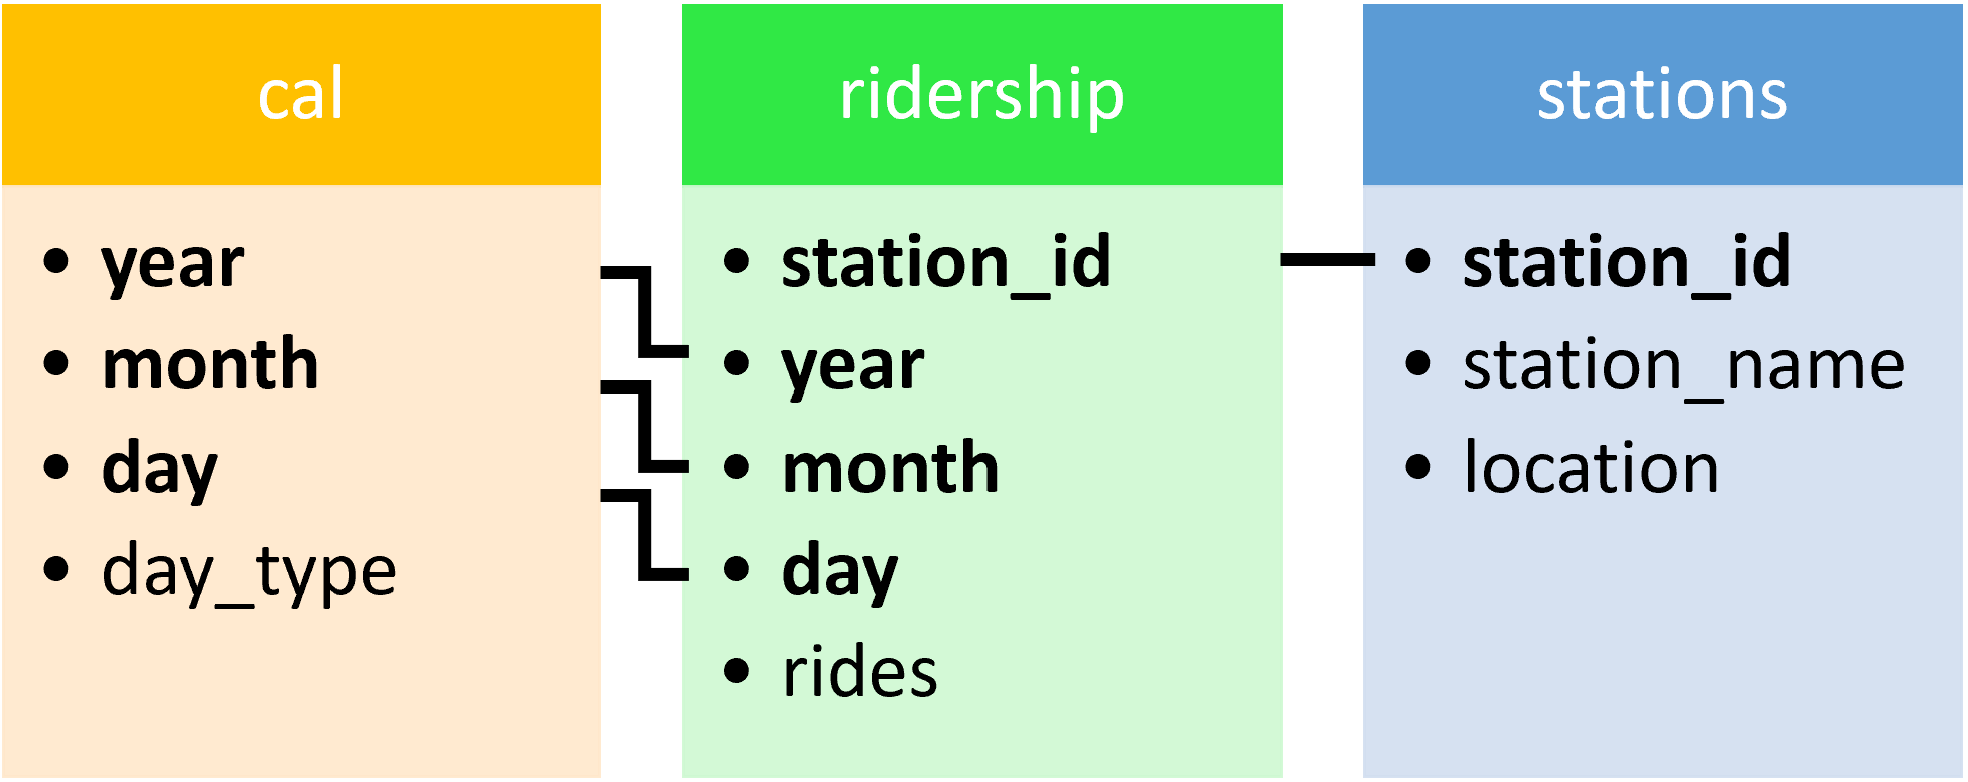


```python

# Instructions 1/3
# 35 XP
# 1. Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.

# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, how='left', on=['year', 'month', 'day'])


# Instructions 2/3
# 35 XP
# 2. Extend the previous merge to three tables by also merging the stations table.

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on=['station_id'])

# Instructions 3/3
# 30 XP
# 3. Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.


# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())


# <script.py> output:
#     140005


### Exercise
Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.

Instructions
100 XP
Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
Group the results of the three merged tables by the column alderman and find the median income.

```python

# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))


# <script.py> output:
#                                  income
#     alderman                           
#     Ameya Pawar                 66246.0
#     Anthony A. Beale            38206.0
#     Anthony V. Napolitano       82226.0
#     Ariel E. Reyboras           41307.0
#     Brendan Reilly             110215.0
#     Brian Hopkins               87143.0
#     Carlos Ramirez-Rosa         66246.0
#     Carrie M. Austin            38206.0
#     Chris Taliaferro            55566.0
#     Daniel "Danny" Solis        41226.0
#     David H. Moore              33304.0

```


### Exercise
One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

The land_use, census, and licenses tables have been loaded for you.

Instructions 1/3
35 XP
1.Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.

```python

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                       .merge(licenses, on='ward', suffixes=('_cen', '_lic'))


# Instructions 2/3
# 35 XP
# 2.Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})


# Instructions 3/3
# 30 XP
# 3.Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

# <script.py> output:
#        ward  pop_2010  vacant  account
#     47    7     51581      19       80
#     12   20     52372      15      123
#     1    10     51535      14      130
#     16   24     54909      13       98
#     7    16     51954      13      156
```

End...